In [21]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from DS_class import *
from DS_Planck_Unet import train_pix_act, val_pix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, \
    plot_roc_curve

In [13]:
#train = gen_data_for_class(2/15, 9000, ['planck_z', 'act'], train_pix_act)
#val = gen_data_for_class(2/15, 400, ['planck_z', 'act'], val_pix)
train = [np.load('/home/rt2122/Data/class_data/train_x.npy'), 
         np.load('/home/rt2122/Data/class_data/train_y.npy')]
val = [np.load('/home/rt2122/Data/class_data/val_x.npy'), 
         np.load('/home/rt2122/Data/class_data/val_y.npy')]

In [14]:
clf = RandomForestClassifier(max_depth=256, random_state=0, n_estimators=256)
clf.fit(*train)

RandomForestClassifier(max_depth=256, n_estimators=256, random_state=0)

In [15]:
clf.score(*val)

0.8675

In [5]:
np.save('/home/rt2122/Data/class_data/train_x', train[0])
np.save('/home/rt2122/Data/class_data/train_y', train[1])
np.save('/home/rt2122/Data/class_data/val_x', val[0])
np.save('/home/rt2122/Data/class_data/val_y', val[1])

In [16]:
train_pz = gen_data_for_class(2/15, 1000, ['planck_z'], train_pix_act)
val_pz = gen_data_for_class(2/15, 400, ['planck_z'], val_pix)

In [17]:
clf_pz = RandomForestClassifier(max_depth=256, random_state=0, n_estimators=256)
clf_pz.fit(*train_pz)
clf_pz.score(*val_pz)

0.8675

In [8]:
clf_pz.score(*val)

0.8675

In [9]:
ans = clf_pz.predict_proba(val_pz[0])

(array([0.91015625, 0.08984375]), False)

In [16]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/c_act_ep11_val_st8_thr.1.csv')

In [17]:
def detected_cat2class(cat_df, clf, label='class', radius=7.5/60, class_len=50):
    import numpy as np
    import pandas as pd
    from DS_healpix_fragmentation import radec2pix
    
    X = np.stack([radec2line_class([cat_df['RA'].iloc[i], cat_df['DEC'].iloc[i]], 
                                radius=radius, class_len=class_len).flatten()
               for i in range(len(cat_df))])
    ans = clf.predict_proba(X)
    df[label] = ans[:, 1]
    return df

In [18]:
df = detected_cat2class(df, clf_pz, 'clf_pz')

In [19]:
stats = {}
stats['tp'] = df[df['status'] == 'tp']['clf_pz']
stats['fp'] = df[df['status'] == 'fp']['clf_pz']

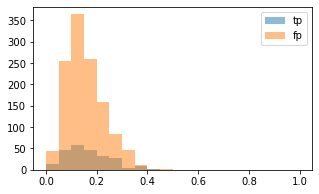

In [13]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.hist(stats['tp'], bins=20, range=(0, 1), alpha=0.5, label='tp')
ax.hist(stats['fp'], bins=20, range=(0, 1), alpha=0.5, label='fp')
ax.legend()

In [14]:
len(stats['tp']), len(stats['fp'])

(237, 1226)

In [24]:
stats['tp'].max()
stats['fp'].max()

0.56640625

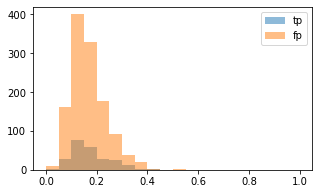

In [15]:
df = detected_cat2class(df, clf, 'clf')
stats = {}
stats['tp'] = df[df['status'] == 'tp']['clf']
stats['fp'] = df[df['status'] == 'fp']['clf']
_, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.hist(stats['tp'], bins=20, range=(0, 1), alpha=0.5, label='tp')
ax.hist(stats['fp'], bins=20, range=(0, 1), alpha=0.5, label='fp')
ax.legend()

In [20]:
df = df.rename({'clf' : 'rf', 'clf_pz' : 'rf_pz'}, axis='columns')
df.to_csv('/home/rt2122/Data/detected_cats/c_act_ep11_val_st8_thr.1_ranged.csv')

In [2]:
df = pd.read_csv('/home/rt2122/Data/detected_cats/c_act_ep11_val_st8_thr.1_ranged.csv')

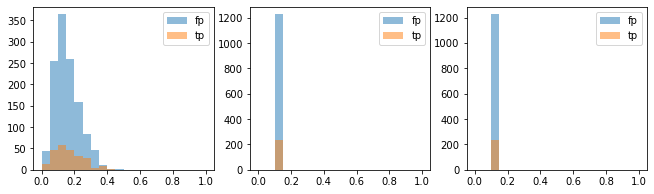

In [8]:
_, ax = plt.subplots(1, 3, figsize=(11, 3))
for i, cl in enumerate(['rf_pz', 'mlp', 'svm']):
    tp = df[df['status'] == 'tp'][cl]
    fp = df[df['status'] == 'fp'][cl]
    
    ax[i].hist(fp, bins=20, range=(0, 1), alpha=0.5, label='fp')
    ax[i].hist(tp, bins=20, range=(0, 1), alpha=0.5, label='tp')
    ax[i].legend()

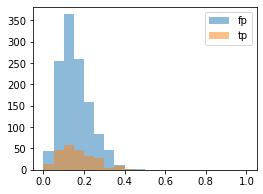

In [9]:
_, ax = plt.subplots(1, 1, figsize=(4, 3))

tp = df[df['status'] == 'tp']['rf_pz']
fp = df[df['status'] == 'fp']['rf_pz']

ax.hist(fp, bins=20, range=(0, 1), alpha=0.5, label='fp')
ax.hist(tp, bins=20, range=(0, 1), alpha=0.5, label='tp')
ax.legend()

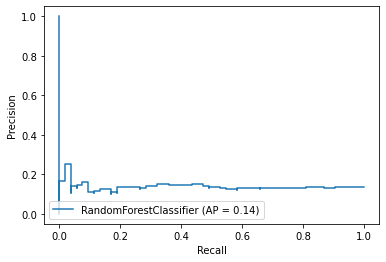

In [18]:
plot_precision_recall_curve(clf, *val)

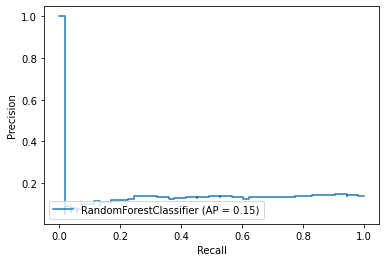

In [20]:
plot_precision_recall_curve(clf_pz, *val)

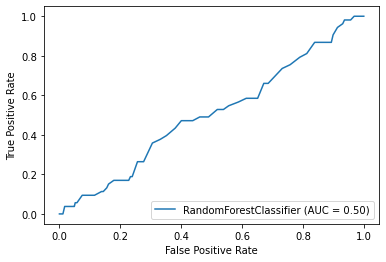

In [22]:
plot_roc_curve(clf, *val)

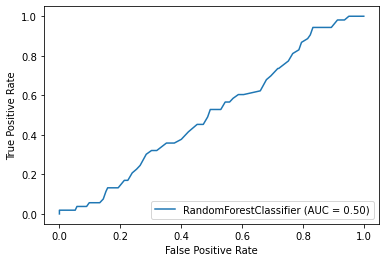

In [23]:
plot_roc_curve(clf_pz, *val)